In [ ]:
!pip install networkx 
!pip install retworkx
!pip install Qiskit
!pip install qiskit_nature
!pip install qiskit_ignis
!pip install qiskit-ibm-runtime
!pip install mthree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np

from time import time

import matplotlib.pyplot as plt

import networkx as nx

from qiskit.primitives import Estimator

from qiskit import IBMQ
#from qiskit.providers.aer import QasmSimulator, Aer

from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute

from qiskit.circuit import Gate, Instruction, Parameter,ParameterVector

from qiskit.opflow import X, Z, I,Y

from qiskit.result import marginal_counts

import mthree
import util
from qiskit_ibm_runtime import (QiskitRuntimeService, Session,
                                Estimator as RuntimeEstimator,
                                Sampler as RuntimeSampler)
from qiskit.primitives import Sampler

import itselfmiti1

from qiskit.providers.aer import QasmSimulator, Aer

from qiskit.utils.mitigation.fitters import CompleteMeasFitter,TensoredFilter,TensoredMeasFitter

from qiskit.ignis.mitigation.measurement import complete_meas_cal, tensored_meas_cal

import copy

In [ ]:
provider = IBMQ.enable_account('c0df7c866f628346a4ad9eb0955b0b9e8ffedc7dc25fa33a87a59e50864c059fa00f211c7f611efee085a4b810646179209cc819b26a4903c733466bb8b96f51')
IBMQ.update_account()
print(IBMQ.providers())


provider = IBMQ.get_provider(hub='ibm-q',
                            group='open', 
                            project='main')
backend_sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_belem'))
backend_real_jakarta = provider.get_backend('ibmq_belem')
backend_sim_ideal = Aer.get_backend('aer_simulator')
BACKEND = backend_real_jakarta


Found 0 credentials.
No credentials available for updating could be found. No action will be performed.
[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>, <AccountProvider for IBMQ(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')>]


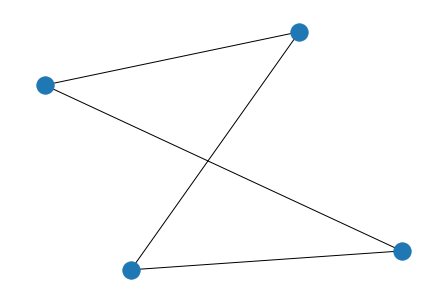

In [ ]:

g = nx.Graph()
 
g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(0, 3)

nx.draw(g)
plt.show()


In [ ]:
g=1
h=1

In [ ]:
edge_list=[[0,1],[2,1],[2,3],[0,3]]

In [ ]:
def trotter_step_OBC(dt):

  qr=QuantumRegister(4)
  circuit = QuantumCircuit(qr)

  for i in range (0,4):
    circuit.rx(g*dt, qr[i])
  
  for vert in edge_list:
    circuit.cx(qr[vert[1]],qr[vert[0]])
    circuit.rz(h*dt,qr[vert[0]])
    circuit.cx(qr[vert[1]],qr[vert[0]])
  #circuit=transpile(circuit,optimization_level=3,coupling_map=[[0,1],[1,2],[1,3]],basis_gates=['cx', 'id', 'rz', 'sx', 'x'])
  return circuit

In [ ]:
trotter_step_OBC(0.01).draw()

┌──────────┐┌───┐┌──────────┐┌───┐                                       »
q0_0: ┤ Rx(0.01) ├┤ X ├┤ Rz(0.01) ├┤ X ├───────────────────────────────────────»
      ├──────────┤└─┬─┘└──────────┘└─┬─┘                                       »
q0_1: ┤ Rx(0.01) ├──■────────────────■────■────────────────■───────────────────»
      ├──────────┤                      ┌─┴─┐┌──────────┐┌─┴─┐┌───┐┌──────────┐»
q0_2: ┤ Rx(0.01) ├──────────────────────┤ X ├┤ Rz(0.01) ├┤ X ├┤ X ├┤ Rz(0.01) ├»
      ├──────────┤                      └───┘└──────────┘└───┘└─┬─┘└──────────┘»
q0_3: ┤ Rx(0.01) ├──────────────────────────────────────────────■──────────────»
      └──────────┘                                                             »
«           ┌───┐┌──────────┐┌───┐
«q0_0: ─────┤ X ├┤ Rz(0.01) ├┤ X ├
«           └─┬─┘└──────────┘└─┬─┘
«q0_1: ───────┼────────────────┼──
«      ┌───┐  │                │  
«q0_2: ┤ X ├──┼────────────────┼──
«      └─┬─┘  │                │  
«q0_3: ──■────■────────────────■──
«

In [ ]:
def N_circ_OBC(N,t):
  qr=QuantumRegister(4)
  circuit = QuantumCircuit(qr) 

  dt=t/N
  for _ in range (0,N):
    circuit.append(trotter_step_OBC(dt),qr)
  return circuit


In [ ]:
print(transpile(N_circ_OBC(2,0.01),basis_gates=['cx', 'id', 'rz', 'sx', 'x'],optimization_level=3).count_ops())

OrderedDict([('rz', 28), ('sx', 16), ('cx', 16)])


In [ ]:
qr = QuantumRegister(5)
mit_pattern = [[0]]
shots=100000
meas_calibs, state_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')
print(len(meas_calibs))
job_cal = execute(meas_calibs, backend=backend_sim_noisy_jakarta, shots=shots)
cal_results = job_cal.result()
cal_counts=cal_results.get_counts()
print(cal_counts)
meas_fitter = TensoredMeasFitter(cal_results, mit_pattern=mit_pattern)


2
[{'1': 517, '0': 99483}, {'0': 4653, '1': 95347}]


In [ ]:
def circs_run(num_trots,num_times,time,backend,qubits=[0,1,2,3],qubits_measure=[0],shots=10000):
    circs=[]
    times=time*np.arange(1,num_times+1,1,dtype=float)/(num_times+1)
    print(times)
    config=backend.configuration()
    N_qubits_backend=config.n_qubits
    N_qubits_measure=len(qubits_measure)

    for i in range (0,num_trots):
      for k in range (0,num_times):
        circ_evo=transpile(N_circ_OBC(i+2,times[k]),backend=BACKEND,optimization_level=3,initial_layout=[0,1,2,3])
        qr=QuantumRegister(N_qubits_backend,name="q")
        cr=ClassicalRegister(len(qubits_measure))
        qc=QuantumCircuit(qr,cr)
        qc.append(circ_evo,qr)
        for j,qubit in enumerate(qubits_measure):
          qc.measure(qr[qubit],cr[j])
        circs.append(qc)
        if (k==0):
          calci=copy.deepcopy(qc)
          calci.remove_final_measurements()
          calci=transpile(calci,basis_gates=['cx', 'id', 'rz', 'sx', 'x'],optimization_level=0)
          print(calci.count_ops())
      cal_circs_GEM, s_labels = util.GEM_calibration_circuits(calci,qubits_measure=qubits_measure)
      circs.append(cal_circs_GEM[0][0])
      #print(transpile(cal_circs_GEM[0][0],basis_gates=['cx', 'id', 'rz', 'sx', 'x'],optimization_level=0).count_ops())
      circs.append(cal_circs_GEM[0][1])
      #print(transpile(cal_circs_GEM[0][1],basis_gates=['cx', 'id', 'rz', 'sx', 'x'],optimization_level=0).count_ops())
      circs.append(cal_circs_GEM[1][0])
      #print(transpile(cal_circs_GEM[1][0],basis_gates=['cx', 'id', 'rz', 'sx', 'x'],optimization_level=0).count_ops())
      circs.append(cal_circs_GEM[1][1])
      #print(transpile(cal_circs_GEM[1][1],basis_gates=['cx', 'id', 'rz', 'sx', 'x'],optimization_level=0).count_ops())
    return circs,s_labels

In [ ]:
circuits=[]
num_trots=6
num_times=12
time=2*np.pi
shots=10000
config=BACKEND.configuration()
initial_layout=[0,1,2,3]
N_qubits_backend=config.n_qubits
times=time*np.arange(1,num_times+1,1,dtype=float)/(num_times+1)

In [ ]:
circ_meas,s_labels=itselfmiti1.qiskit_calibration_circuits(5,qubits_measure=[initial_layout[0]])
circs,s_labels=circs_run(num_trots,num_times,time,BACKEND,qubits=initial_layout,qubits_measure=[initial_layout[0]])
circuits+=circ_meas
circuits+=circs
print(len(circuits))
for circ in circuits:
  print(transpile(circ,optimization_level=0,backend=BACKEND).count_ops())

[0.48332195 0.96664389 1.44996584 1.93328779 2.41660973 2.89993168
 3.38325363 3.86657557 4.34989752 4.83321947 5.31654141 5.79986336]
OrderedDict([('rz', 30), ('cx', 25), ('sx', 16)])
OrderedDict([('rz', 46), ('cx', 39), ('sx', 24)])
OrderedDict([('rz', 62), ('cx', 53), ('sx', 32)])
OrderedDict([('rz', 78), ('cx', 67), ('sx', 40)])
OrderedDict([('rz', 94), ('cx', 81), ('sx', 48)])
OrderedDict([('rz', 110), ('cx', 95), ('sx', 56)])
98
OrderedDict([('measure', 1)])
OrderedDict([('x', 1), ('measure', 1)])
OrderedDict([('rz', 30), ('cx', 25), ('sx', 16), ('measure', 1)])
OrderedDict([('rz', 30), ('cx', 25), ('sx', 16), ('measure', 1)])
OrderedDict([('rz', 30), ('cx', 25), ('sx', 16), ('measure', 1)])
OrderedDict([('rz', 30), ('cx', 25), ('sx', 16), ('measure', 1)])
OrderedDict([('rz', 30), ('cx', 25), ('sx', 16), ('measure', 1)])
OrderedDict([('rz', 30), ('cx', 25), ('sx', 16), ('measure', 1)])
OrderedDict([('rz', 30), ('cx', 25), ('sx', 16), ('measure', 1)])
OrderedDict([('rz', 30), ('cx

[0.48332195 0.96664389 1.44996584 1.93328779 2.41660973 2.89993168
 3.38325363 3.86657557 4.34989752 4.83321947 5.31654141 5.79986336]
OrderedDict([('rz', 30), ('cx', 25), ('sx', 16)])
OrderedDict([('rz', 116), ('sx', 32), ('cx', 24), ('measure', 1)])
OrderedDict([('rz', 116), ('sx', 32), ('cx', 24), ('x', 1), ('measure', 1)])
OrderedDict([('cx', 24), ('rz', 8), ('measure', 1)])
OrderedDict([('cx', 24), ('rz', 8), ('x', 1), ('measure', 1)])
OrderedDict([('rz', 46), ('cx', 39), ('sx', 24)])
OrderedDict([('rz', 134), ('cx', 38), ('sx', 36), ('measure', 1)])
OrderedDict([('rz', 134), ('cx', 38), ('sx', 36), ('x', 1), ('measure', 1)])
OrderedDict([('rz', 54), ('cx', 38), ('sx', 12), ('measure', 1)])
OrderedDict([('rz', 54), ('cx', 38), ('sx', 12), ('x', 1), ('measure', 1)])
OrderedDict([('rz', 62), ('cx', 53), ('sx', 32)])
OrderedDict([('rz', 180), ('cx', 52), ('sx', 48), ('measure', 1)])
OrderedDict([('rz', 180), ('cx', 52), ('sx', 48), ('x', 1), ('measure', 1)])
OrderedDict([('rz', 72), 

cal_matrix
[array([[0.88990681, 0.17072654],
       [0.11009319, 0.82927346]])]
[array([[ 1.        ,  0.07919704],
       [-0.01856369,  0.93936665]])]


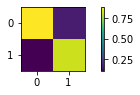

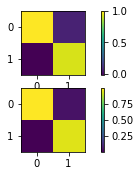

{'0': 8306.502859750408, '1': 1693.4971402495914}
new_counts
{'0': 9226.013204408762, '1': 773.986795591238}
{'0': 7743.062910414479, '1': 2256.93708958552}
new_counts
{'0': 8490.06879844222, '1': 1509.9312015577798}
{'0': 7245.286956302788, '1': 2754.713043697211}
new_counts
{'0': 7839.892272470071, '1': 2160.107727529928}
{'0': 6884.1347172197, '1': 3115.8652827803007}
new_counts
{'0': 7368.168585910842, '1': 2631.8314140891594}
{'0': 6300.571913207138, '1': 3699.4280867928624}
new_counts
{'0': 6605.940452017658, '1': 3394.059547982342}
{'0': 5514.721457441865, '1': 4485.278542558135}
new_counts
{'0': 5579.491675127867, '1': 4420.508324872133}
{'0': 5205.464944152963, '1': 4794.535055847037}
new_counts
{'0': 5175.552264669078, '1': 4824.447735330922}
{'0': 5450.116501390436, '1': 4549.883498609564}
new_counts
{'0': 5495.107072900423, '1': 4504.892927099578}
{'0': 6133.234485093608, '1': 3866.765514906391}
new_counts
{'0': 6387.370497448185, '1': 3612.6295025518148}
{'0': 6808.9387839

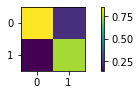

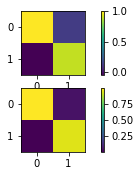

{'0': 8025.841983957056, '1': 1974.1580160429437}
new_counts
{'0': 9228.824177824186, '1': 771.1758221758115}
{'0': 7756.831179872354, '1': 2243.168820127645}
new_counts
{'0': 8832.709597297491, '1': 1167.2904027025074}
{'0': 7384.0288073476595, '1': 2615.971192652341}
new_counts
{'0': 8283.763409376059, '1': 1716.2365906239424}
{'0': 6933.912306922305, '1': 3066.0876930776953}
new_counts
{'0': 7620.97326843438, '1': 2379.026731565621}
{'0': 6768.693072654403, '1': 3231.3069273455976}
new_counts
{'0': 7377.690297329747, '1': 2622.309702670252}
{'0': 6538.868883897925, '1': 3461.1311161020744}
new_counts
{'0': 7039.2774501806925, '1': 2960.7225498193056}
{'0': 6440.372802178424, '1': 3559.6271978215773}
new_counts
{'0': 6894.243371617965, '1': 3105.7566283820365}
{'0': 6213.7259055307695, '1': 3786.27409446923}
new_counts
{'0': 6560.509041880801, '1': 3439.490958119197}
{'0': 5992.374497969874, '1': 4007.6255020301255}
new_counts
{'0': 6234.572244459943, '1': 3765.427755540056}
{'0': 56

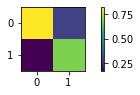

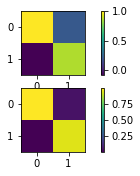

{'0': 7893.454776575027, '1': 2106.5452234249733}
new_counts
{'0': 9392.439001579036, '1': 607.5609984209623}
{'0': 7666.80787977719, '1': 2333.192120222811}
new_counts
{'0': 9014.479546167227, '1': 985.5204538327723}
{'0': 7453.929252305542, '1': 2546.0707476944576}
new_counts
{'0': 8659.480244412987, '1': 1340.5197555870102}
{'0': 7140.436348203355, '1': 2859.5636517966436}
new_counts
{'0': 8136.695203082301, '1': 1863.3047969176953}
{'0': 6960.389748258418, '1': 3039.610251741582}
new_counts
{'0': 7836.447038093591, '1': 2163.552961906408}
{'0': 6906.375768154864, '1': 3093.6242318451355}
new_counts
{'0': 7746.372588396743, '1': 2253.6274116032555}
{'0': 6883.075619481637, '1': 3116.9243805183633}
new_counts
{'0': 7707.516942773664, '1': 2292.483057226335}
{'0': 6723.15187455902, '1': 3276.84812544098}
new_counts
{'0': 7440.825925193642, '1': 2559.174074806356}
{'0': 6543.1052742300635, '1': 3456.8947257699356}
new_counts
{'0': 7140.577759564536, '1': 2859.422240435462}
{'0': 6237.0

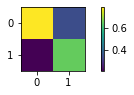

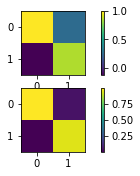

{'0': 7633.975644614852, '1': 2366.0243553851474}
new_counts
{'0': 9489.756946639944, '1': 510.2430533600563}
{'0': 7463.461131040951, '1': 2536.5388689590486}
new_counts
{'0': 9157.170039677061, '1': 842.829960322937}
{'0': 7244.227918038003, '1': 2755.772081961998}
new_counts
{'0': 8729.5577814127, '1': 1270.4422185873004}
{'0': 7117.136199875302, '1': 2882.8638001246977}
new_counts
{'0': 8481.666616265567, '1': 1518.33338373443}
{'0': 7061.004024575751, '1': 2938.995975424249}
new_counts
{'0': 8372.18135209253, '1': 1627.81864790747}
{'0': 6982.630798431704, '1': 3017.3692015682964}
new_counts
{'0': 8219.315133694916, '1': 1780.684866305085}
{'0': 7052.531244158759, '1': 2947.4687558412406}
new_counts
{'0': 8355.65527596446, '1': 1644.3447240355388}
{'0': 7097.013344681611, '1': 2902.9866553183892}
new_counts
{'0': 8442.417182139065, '1': 1557.5828178609347}
{'0': 6888.3711088137015, '1': 3111.628891186298}
new_counts
{'0': 8035.462522182491, '1': 1964.5374778175085}
{'0': 6839.6526

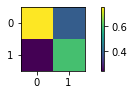

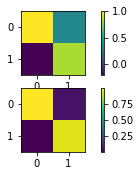

{'0': 8644.354818657936, '1': 1355.6451813420638}
new_counts
{'0': 12550.846192484736, '1': -2550.846192484736}
{'0': 7355.4331714748705, '1': 2644.566828525129}
new_counts
{'0': 9517.744187513144, '1': 482.2558124868549}
{'0': 7203.982210687966, '1': 2796.017789312035}
new_counts
{'0': 9161.34842534903, '1': 838.6515746509722}
{'0': 6808.938784224612, '1': 3191.0612157753885}
new_counts
{'0': 8231.728683547408, '1': 1768.2713164525962}
{'0': 6950.857869520436, '1': 3049.142130479565}
new_counts
{'0': 8565.693950633467, '1': 1434.3060493665362}
{'0': 7006.990044646334, '1': 2993.0099553536656}
new_counts
{'0': 8697.7846896554, '1': 1302.2153103446008}
{'0': 7046.176657587104, '1': 2953.8233424128957}
new_counts
{'0': 8789.998979436674, '1': 1210.0010205633278}
{'0': 7101.2497347364415, '1': 2898.7502652635594}
new_counts
{'0': 8919.597439580997, '1': 1080.4025604190067}
{'0': 7018.640118881322, '1': 2981.3598811186775}
new_counts
{'0': 8725.199749055975, '1': 1274.800250944026}
{'0': 6

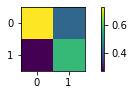

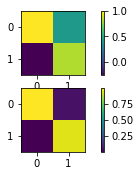

{'0': 7227.282355917311, '1': 2772.7176440826893}
new_counts
{'0': 9750.595475376967, '1': 249.40452462303293}
{'0': 6996.399068502692, '1': 3003.6009314973085}
new_counts
{'0': 9122.038405342324, '1': 877.9615946576758}
{'0': 7058.8858292540035, '1': 2941.114170745997}
new_counts
{'0': 9292.152473335767, '1': 707.8475266642332}
{'0': 6873.543739814379, '1': 3126.456260185622}
new_counts
{'0': 8787.57684121969, '1': 1212.4231587803104}
{'0': 6758.102096947675, '1': 3241.8979030523255}
new_counts
{'0': 8473.298308490836, '1': 1526.7016915091647}
{'0': 6840.711713595334, '1': 3159.288286404666}
new_counts
{'0': 8698.194874968993, '1': 1301.805125031005}
{'0': 6998.517263285077, '1': 3001.4827367149214}
new_counts
{'0': 9127.804982564467, '1': 872.1950174355276}
{'0': 7109.722518094933, '1': 2890.277481905067}
new_counts
{'0': 9430.550364954204, '1': 569.4496350457923}
{'0': 7038.762974366504, '1': 2961.237025633497}
new_counts
{'0': 9237.36997759754, '1': 762.6300224024609}
{'0': 6910.61

In [ ]:
job=execute(circuits,BACKEND,shots=shots,initial_layout=[0,1,2,3,4],optimization_level=0)
job_result=job.result()
job_counts=job_result.get_counts()

In [ ]:
job = provider.get_backend('ibmq_belem').retrieve_job('63f10ed0ce494c8b1fb8627a')

job_result=job.result()
job_counts=job_result.get_counts()

In [ ]:
def bootstrap_counts(counts, k, L, return_mean=False):
    """
    Prende in input un dizionario di counts e restituisce k ricampionamenti di lunghezza L.
    Se return_mean è True, restituisce invece il dizionario di counts medio dei k ricampionamenti.
    """
    shots = sum(counts.values())
    measurements = np.random.multinomial(L, [c/shots for c in counts.values()], k)
    if return_mean:
        return dict(zip(counts.keys(), np.mean(measurements, axis=0)))
    else:
        return [dict(zip(counts.keys(), m)) for m in measurements]

In [ ]:
def bootstrap_mitigated_expectation(counts, observable, k, L, complete_meas_fitter=None):
    """
    Prende in input un dizionario di counts, un'osservabile, il numero di ricampionamenti k,
    la lunghezza dei campioni L e un oggetto CompleteMeasFitter (opzionale).
    Restituisce la media e la deviazione bootstrap dell'osservabile su k campioni di lunghezza L,
    ognuno dei quali può essere sottoposto a mitigazione degli errori mediante il fitter fornito.
    """
    if complete_meas_fitter is not None:
        bootstrapped_counts = bootstrap_counts(counts, k, L)
        expectation_values = []
        for b_counts in bootstrapped_counts:
            b_mitigated_counts = complete_meas_fitter.filter.apply(b_counts)
            b_mitigated_counts = bootstrap_counts(b_mitigated_counts, int(k/10), int(L/10) ,return_mean=True)
            b_shots_miti= sum(b_mitigated_counts.values())
            b_expectation = mthree.utils.expval(observable, b_mitigated_counts)/b_shots_miti
            expectation_values.append(b_expectation)
    else:
        bootstrapped_counts = bootstrap_counts(counts, k, L)
        expectation_values = []
        for b_counts in bootstrapped_counts:
            b_shots = sum(b_counts.values())
            b_expectation = mthree.utils.expval(b_counts,observable)
            expectation_values.append(b_expectation)
    mean = np.mean(expectation_values)
    std = np.std(expectation_values, ddof=1)
    return mean, std


In [ ]:
shots=10000
boot_counts=[]
for counts in job_counts:
  boot_counts.append(bootstrap_counts(counts,50,shots,return_mean=True))

In [ ]:
P_t=[]
G=[]
Probs_GEM=[]
Probs_GEM_P=[]
Probs_raw=[]
Probs_meas=[]
d_GEM=[]
d_AMP=[]
d_RAW=[]
d_MEAS=[]
C_GEM=[]
C_GEM_plus=[]
C_qiskit=[]

n_ric=50
n_samp=1000

s_labels=util.bin_list(1)

job_qiskit=copy.deepcopy(cal_results)
job_qiskit.results[0].data.counts=boot_counts[0]
job_qiskit.results[1].data.counts=boot_counts[1]

print(job_qiskit.get_counts())


meas_fitter = CompleteMeasFitter(job_qiskit, state_labels=s_labels)
for trot in range(0,num_trots):
    print(trot)
    job_GEM_L=copy.deepcopy(cal_results)
    job_GEM_L.results[0].data.counts=meas_fitter.filter.apply(boot_counts[trot*(num_times+4)+num_times+2],method="least_squares")
    job_GEM_L.results[1].data.counts=meas_fitter.filter.apply(boot_counts[trot*(num_times+4)+num_times+1+2],method="least_squares")
    job_GEM_R=copy.deepcopy(cal_results)
    job_GEM_R.results[0].data.counts=meas_fitter.filter.apply(boot_counts[trot*(num_times+4)+num_times+2+2],method="least_squares")
    job_GEM_R.results[1].data.counts=meas_fitter.filter.apply(boot_counts[trot*(num_times+4)+num_times+3+2],method="least_squares")
    
    
    meas_fitter_GEM_L = CompleteMeasFitter(job_GEM_L, state_labels=s_labels)
    meas_fitter_GEM_R = CompleteMeasFitter(job_GEM_R, state_labels=s_labels)
    Cal_GEM_L = meas_fitter_GEM_L.cal_matrix
    Cal_GEM_R = meas_fitter_GEM_R.cal_matrix
    C=(Cal_GEM_L+Cal_GEM_R)/2

    C_GEM.append(C)
    C_qiskit.append(meas_fitter.cal_matrix)
    
    a=np.sum(C,axis=1,dtype='float')
    a=a/np.sum(a)
    
    p_t=(C[0][0]-1)/(a[0]-1)
    P_t.append(p_t)
    print(p_t)

    b=dict([('0',p_t*a[0]*shots),('1',p_t*a[1]*shots)])

    G.append(b)
    B=np.zeros((2,2))
    for i in range (0,2):
        for j in range (0,2):
            B[i][j]=(C[i][j]-p_t*a[j])/(1-p_t)
    C_GEM_plus.append(B)
    
    meas_fitter_GEM_plus=copy.deepcopy(meas_fitter)
    meas_fitter_GEM_plus.cal_matrices=C_GEM_plus

    meas_fitter_GEM=copy.deepcopy(meas_fitter)
    meas_fitter_GEM.cal_matrices=C_GEM
    P_GEM=[]
    P_GEM_plus=[]
    P_raw=[]
    P_meas=[]
    d_gem=[]
    d_amp=[]
    d_raw=[]
    d_meas=[]
    for t in range (0,num_times):
      raw_counts=boot_counts[trot*(num_times+4)+t+2]
      meas_counts=meas_fitter.filter.apply(boot_counts[trot*(num_times+4)+t+2],method="least_squares")
      #print(meas_counts)
      if '1' not in meas_counts.keys():
        meas_counts['1']=0
      if '0' not in meas_counts.keys():
        meas_counts['0']=0
      #meas_vect=util.occurences_to_vector(meas_counts)
      c=dict([('0',(meas_counts['0']-b['0'])/(1-p_t)),('1',(meas_counts['1']-b['1'])/(1-p_t))])

      print(b)

      print(c)
      
      if any(v < 0 for v in c.values()):
        sum_c=sum(c.values())
        m = min(c.values())
        c = {k: v - 2 * m for k, v in c.items()}
        sum_counts=sum(c.values())
        for u in c.values():
          u=u/sum_counts*sum_c
      
      print(c)
      p_GEM,d_g=bootstrap_mitigated_expectation(meas_counts,observable={'0':1},k=n_ric,L=n_samp,complete_meas_fitter=meas_fitter_GEM)
      p_GEM_plus,d_a=bootstrap_mitigated_expectation(c,observable={'0':1},k=n_ric,L=n_samp,complete_meas_fitter=meas_fitter_GEM_plus)
      p_raw,d_r=bootstrap_mitigated_expectation(raw_counts,observable={'0':1},k=n_samp,L=shots)
      p_meas,d_m=bootstrap_mitigated_expectation(meas_counts,observable={'0':1},k=n_samp,L=shots)
      P_GEM.append(p_GEM)
      P_GEM_plus.append(p_GEM_plus)
      P_raw.append(p_raw)
      P_meas.append(p_meas)
      d_gem.append(d_g)
      d_amp.append(d_a)
      d_raw.append(d_r)
      d_meas.append(d_m)

    d_GEM.append(d_gem)
    d_AMP.append(d_amp)
    d_RAW.append(d_raw)
    d_MEAS.append(d_meas)
    Probs_GEM.append(P_GEM)
    Probs_GEM_P.append(P_GEM_plus)
    Probs_raw.append(P_raw)
    Probs_meas.append(P_meas)


[{'0': 9955.1, '1': 44.9}, {'0': 519.08, '1': 9480.92}]
0
0.23532222303225278
{'0': 1246.6751908315553, '1': 1106.5470394909726}
{'0': 9227.664255303582, '1': 772.3357446964185}
{'0': 9227.664255303582, '1': 772.3357446964185}
{'0': 1246.6751908315553, '1': 1106.5470394909726}
{'0': 8496.323504342456, '1': 1503.6764956575444}
{'0': 8496.323504342456, '1': 1503.6764956575444}
{'0': 1246.6751908315553, '1': 1106.5470394909726}
{'0': 7851.85112357859, '1': 2148.1488764214105}
{'0': 7851.85112357859, '1': 2148.1488764214105}
{'0': 1246.6751908315553, '1': 1106.5470394909726}
{'0': 7367.3673296772595, '1': 2632.63267032274}
{'0': 7367.3673296772595, '1': 2632.63267032274}
{'0': 1246.6751908315553, '1': 1106.5470394909726}
{'0': 6579.5371943195905, '1': 3420.4628056804104}
{'0': 6579.5371943195905, '1': 3420.4628056804104}
{'0': 1246.6751908315553, '1': 1106.5470394909726}
{'0': 5580.828131498128, '1': 4419.171868501873}
{'0': 5580.828131498128, '1': 4419.171868501873}
{'0': 1246.67519083155

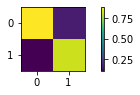

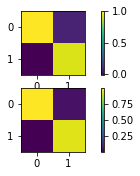

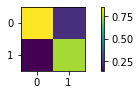

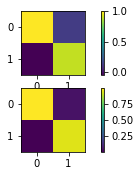

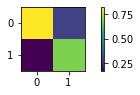

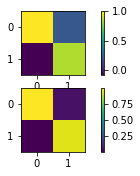

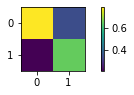

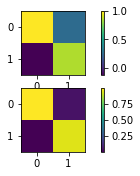

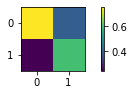

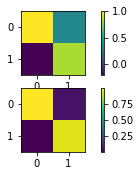

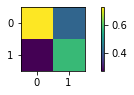

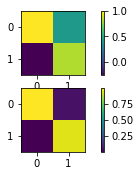

In [ ]:
for i in range (0,num_trots):
  plt.subplot(311)
  plt.imshow(C_GEM[i])
  plt.colorbar()
  plt.show()
  plt.subplot(312)
  plt.imshow(C_GEM_plus[i])
  plt.colorbar()
  plt.subplot(313)
  plt.imshow(C_qiskit[i])
  plt.colorbar()
  plt.show()

In [ ]:
print(P_t)
print(G)

[0.23532222303225278, 0.321512393019637, 0.3994403756994996, 0.486981396188375, 0.5739968739813985, 0.6340420322811371]
[{'0': 1246.6751908315553, '1': 1106.5470394909726}, {'0': 1760.4640216183416, '1': 1454.659908578029}, {'0': 2254.591844995049, '1': 1739.8119119999467}, {'0': 2766.194004444705, '1': 2103.619957439045}, {'0': 3307.5131072643703, '1': 2432.4556325496146}, {'0': 3650.5786313311605, '1': 2689.8416914802106}]


In [ ]:
num_times=100
times_id=time*np.arange(1,num_times+1,1,dtype=float)/(num_times+1)
print(times_id)
id_circ=[]
P_id=[]
shots_ideal=100000
for k in range (0,num_times):
  qr=QuantumRegister(4)
  cr=ClassicalRegister(1)
  qc=QuantumCircuit(qr,cr)
  qc.append(N_circ_OBC(50,times_id[k]),qr)
  qc.measure(qr[0],cr)
  id_circ.append(qc)
job_ideal=execute(id_circ,backend_sim_ideal,shots=shots_ideal)
job_res_id=job_ideal.result()
counts_id=job_res_id.get_counts()
for j in range (0,num_times):
  a=counts_id[j]
  for output in ['0']:
    if output in a:
        P_id.append(a[output]/shots_ideal)
    else:
        P_id.append(0)  
print(P_id)
 

[0.06220976 0.12441951 0.18662927 0.24883902 0.31104878 0.37325853
 0.43546829 0.49767804 0.5598878  0.62209756 0.68430731 0.74651707
 0.80872682 0.87093658 0.93314633 0.99535609 1.05756584 1.1197756
 1.18198535 1.24419511 1.30640487 1.36861462 1.43082438 1.49303413
 1.55524389 1.61745364 1.6796634  1.74187315 1.80408291 1.86629267
 1.92850242 1.99071218 2.05292193 2.11513169 2.17734144 2.2395512
 2.30176095 2.36397071 2.42618047 2.48839022 2.55059998 2.61280973
 2.67501949 2.73722924 2.799439   2.86164875 2.92385851 2.98606826
 3.04827802 3.11048778 3.17269753 3.23490729 3.29711704 3.3593268
 3.42153655 3.48374631 3.54595606 3.60816582 3.67037558 3.73258533
 3.79479509 3.85700484 3.9192146  3.98142435 4.04363411 4.10584386
 4.16805362 4.23026338 4.29247313 4.35468289 4.41689264 4.4791024
 4.54131215 4.60352191 4.66573166 4.72794142 4.79015117 4.85236093
 4.91457069 4.97678044 5.0389902  5.10119995 5.16340971 5.22561946
 5.28782922 5.35003897 5.41224873 5.47445849 5.53666824 5.598878
 

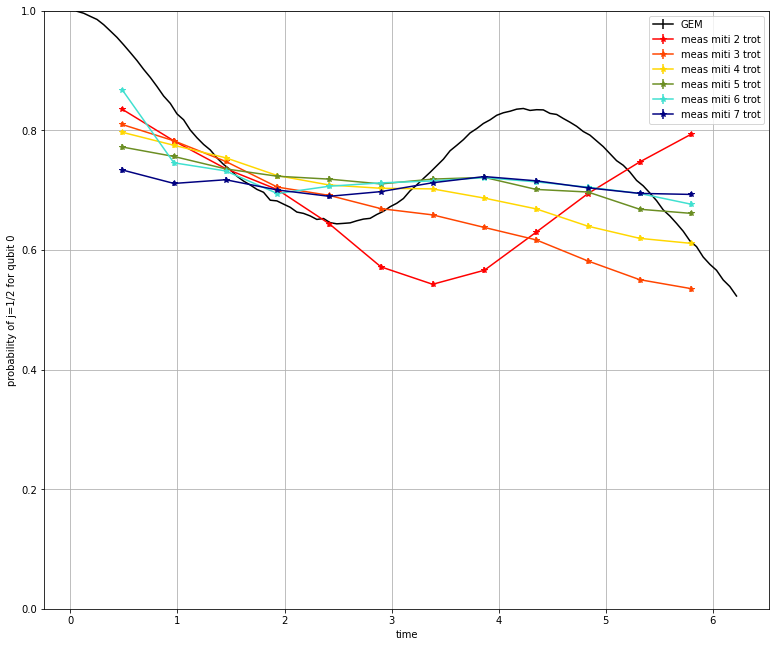

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['meas miti 2 trot','meas miti 3 trot','meas miti 4 trot','meas miti 5 trot','meas miti 6 trot','meas miti 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,P_id, db, linestyle='-', marker='', color='black',label='GEM')
for i in range (0,num_trots):
  plt.errorbar(times,Probs_raw[i], d_RAW[i], linestyle='-', marker='*', color=colors[i],label=labels[i])


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

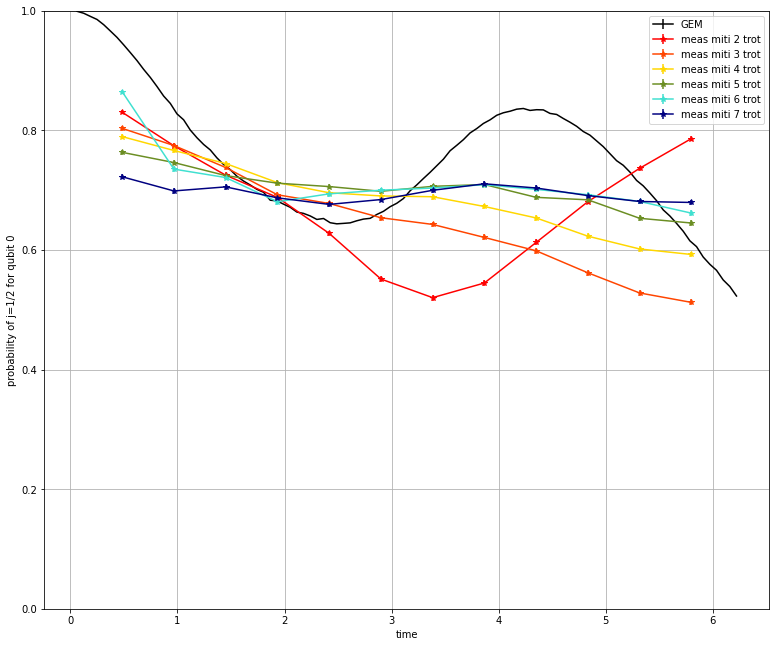

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['meas miti 2 trot','meas miti 3 trot','meas miti 4 trot','meas miti 5 trot','meas miti 6 trot','meas miti 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,P_id, db, linestyle='-', marker='', color='black',label='GEM')
for i in range (0,num_trots):
  plt.errorbar(times,Probs_meas[i], d_MEAS[i], linestyle='-', marker='*', color=colors[i],label=labels[i])


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()

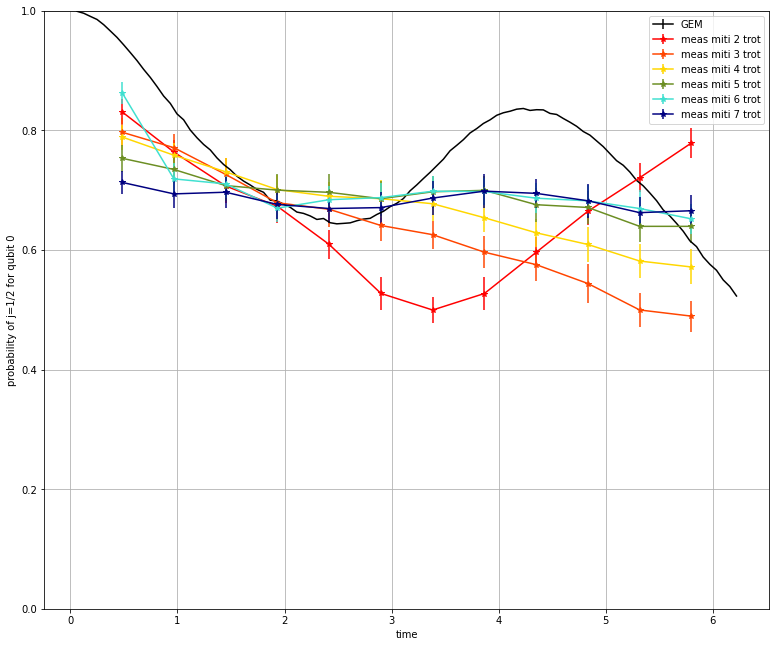

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['meas miti 2 trot','meas miti 3 trot','meas miti 4 trot','meas miti 5 trot','meas miti 6 trot','meas miti 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,P_id, db, linestyle='-', marker='', color='black',label='GEM')
for i in range (0,num_trots):
  plt.errorbar(times,Probs_GEM[i], d_GEM[i], linestyle='-', marker='*', color=colors[i],label=labels[i])


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()

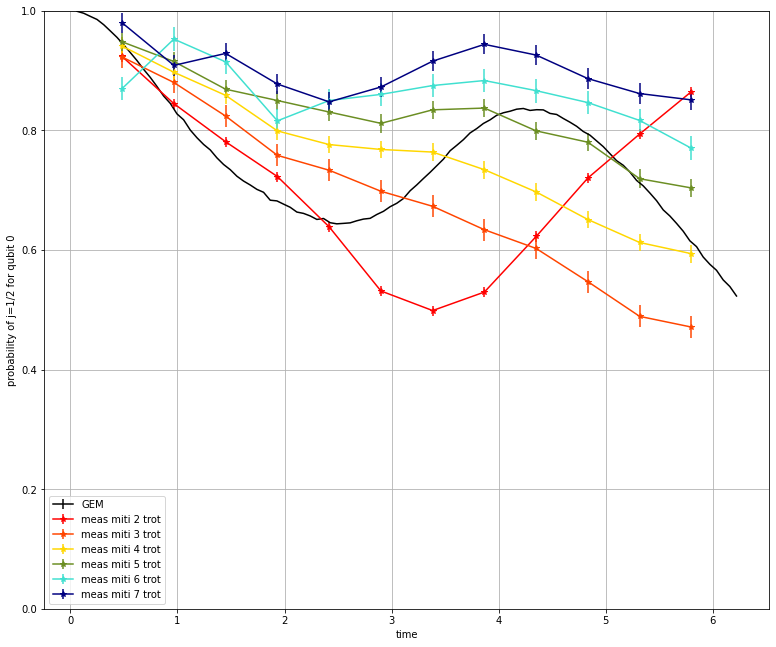

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['meas miti 2 trot','meas miti 3 trot','meas miti 4 trot','meas miti 5 trot','meas miti 6 trot','meas miti 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,P_id, db, linestyle='-', marker='', color='black',label='GEM')
for i in range (0,num_trots):
  plt.errorbar(times,Probs_GEM_P[i], d_amp[i], linestyle='-', marker='*', color=colors[i],label=labels[i])


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()

In [ ]:
ideal_trots=[]
shots_ideal=100000
for j in range (0,num_trots):
  P_id=[]
  id_circ=[]
  for k in range (0,num_times):
    qr=QuantumRegister(4)
    cr=ClassicalRegister(1)
    qc=QuantumCircuit(qr,cr)
    qc.append(N_circ_OBC(j+2,times_id[k]),qr)
    qc.measure(qr[0],cr)
    id_circ.append(qc)
  job_ideal=execute(id_circ,backend_sim_ideal,shots=shots_ideal)
  job_res_id=job_ideal.result()
  counts_id=job_res_id.get_counts()

  for i in range (0,num_times):
    a=counts_id[i]
    for output in ['0']:
      if output in a:
          P_id.append(a[output]/shots_ideal)
      else:
          P_id.append(0)  
  ideal_trots.append(P_id)
print(P_id)

[0.99918, 0.99644, 0.99097, 0.98435, 0.97671, 0.96733, 0.95576, 0.94416, 0.93143, 0.91766, 0.90244, 0.88784, 0.87363, 0.8569, 0.84313, 0.82997, 0.81495, 0.80051, 0.78754, 0.77697, 0.76404, 0.755, 0.73984, 0.73244, 0.72354, 0.71593, 0.70524, 0.69865, 0.69148, 0.6831, 0.67569, 0.66958, 0.66488, 0.65701, 0.65204, 0.64952, 0.64494, 0.64142, 0.63818, 0.63758, 0.63429, 0.63322, 0.63783, 0.63394, 0.64196, 0.64495, 0.64898, 0.65149, 0.66064, 0.6694, 0.67604, 0.68613, 0.69584, 0.70607, 0.7159, 0.72818, 0.73706, 0.74889, 0.75828, 0.76794, 0.77775, 0.78494, 0.79278, 0.7985, 0.80606, 0.81004, 0.81773, 0.81966, 0.82137, 0.82244, 0.82439, 0.8247, 0.82371, 0.82175, 0.82288, 0.81823, 0.81125, 0.81049, 0.80301, 0.80007, 0.79348, 0.79042, 0.7817, 0.77537, 0.76897, 0.76108, 0.7528, 0.74476, 0.73493, 0.72708, 0.71585, 0.7073, 0.69522, 0.68806, 0.67615, 0.66805, 0.65437, 0.64714, 0.6395, 0.62761]


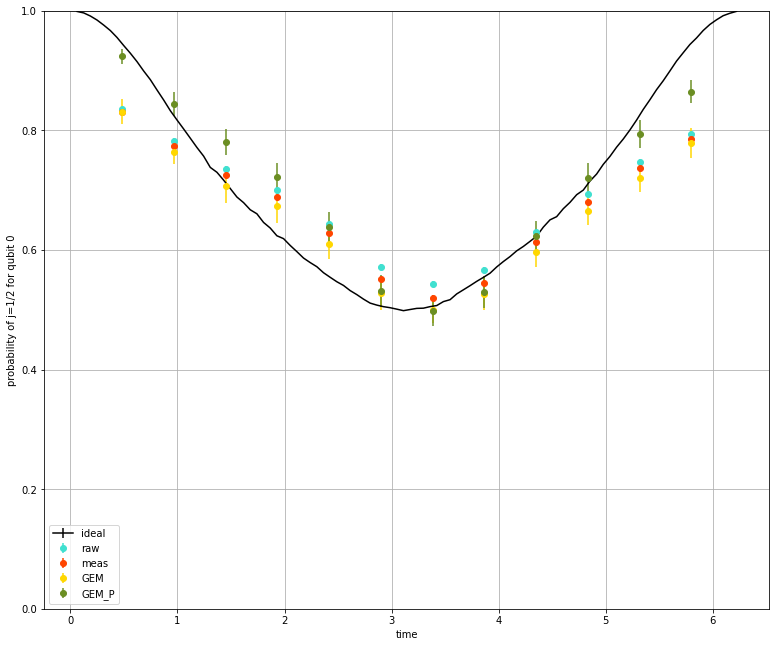

In [ ]:
colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[0], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[0], d_RAW[0], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[0], d_MEAS[0], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[0], d_GEM[0], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[0], d_AMP[0], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

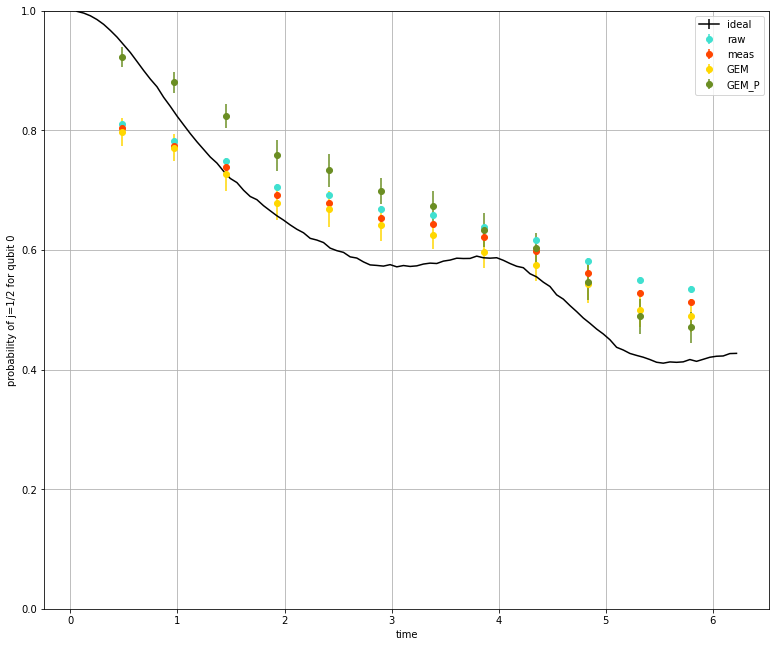

In [ ]:
colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[1], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[1], d_RAW[1], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[1], d_MEAS[1], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[1], d_GEM[1], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[1], d_AMP[1], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

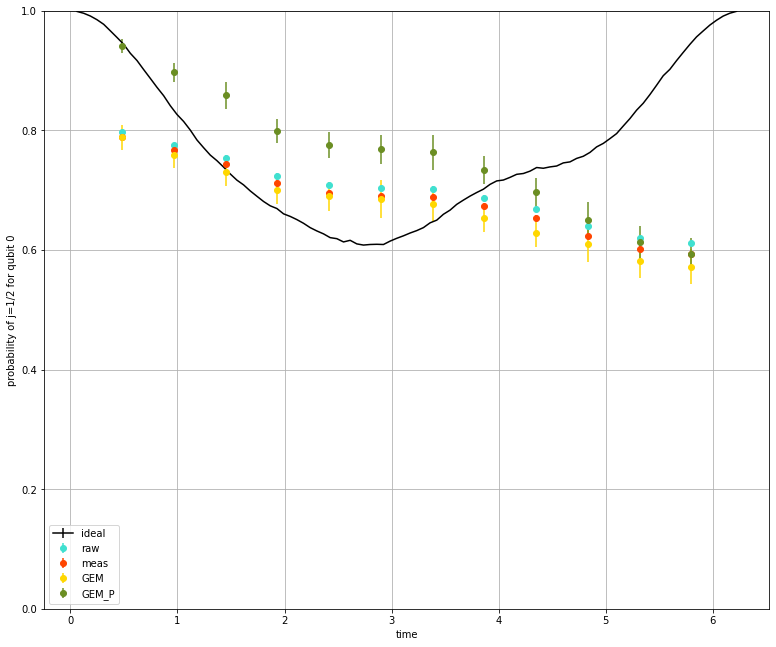

In [ ]:
colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[2], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[2], d_RAW[2], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[2], d_MEAS[2], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[2], d_GEM[2], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[2], d_AMP[2], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

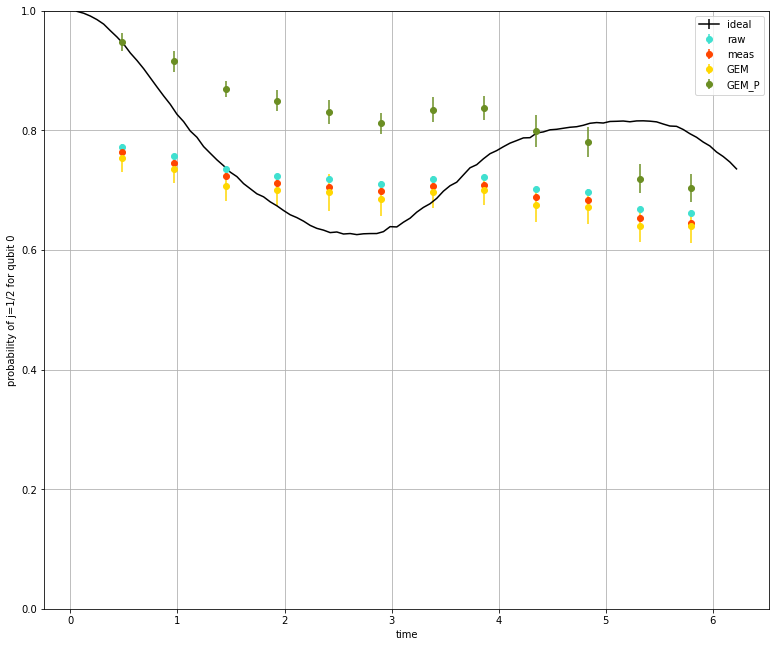

In [ ]:
colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[3], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[3], d_RAW[3], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[3], d_MEAS[3], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[3], d_GEM[3], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[3], d_AMP[3], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

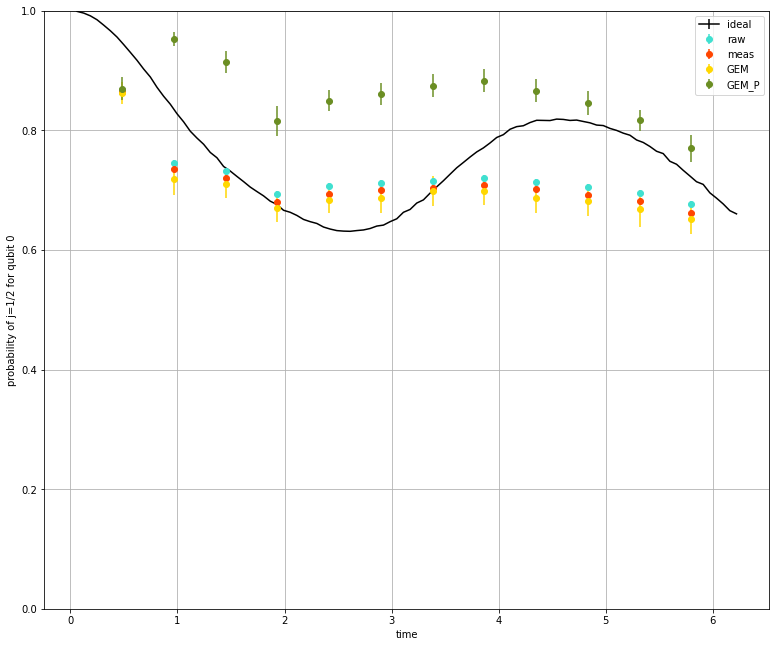

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[4], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[4], d_RAW[4], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[4], d_MEAS[4], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[4], d_GEM[4], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[4], d_AMP[4], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

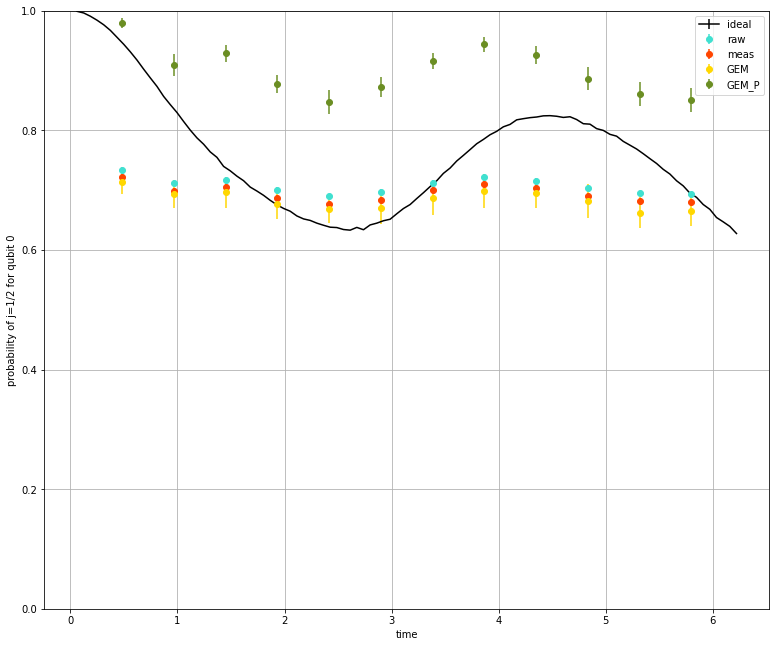

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[5], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[5], d_RAW[5], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[5], d_MEAS[5], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[5], d_GEM[5], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[5], d_AMP[5], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()